In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from scipy.optimize import curve_fit
%matplotlib inline

In [13]:
plt.rc('font', family='Comic Sans MS')
gamma = pd.read_csv("Prom.csv")
nazwy = ["grubosc_Al.csv", "grubosc_Cu.csv", "grubosc_Pb.csv"]
for nazwa in nazwy:
   dane = np.loadtxt(nazwa, delimiter=",")
   np.savetxt("nowa_" + nazwa, dane.T, fmt='%.2f', delimiter=',')
glinXD = pd.read_csv("nowa_grubosc_Al.csv",header=None)
miedzXD = pd.read_csv("nowa_grubosc_Cu.csv",header=None)
olowXD = pd.read_csv("nowa_grubosc_Pb.csv",header=None)
Al = gamma['Al']
Cu = gamma['Cu']
Pb = gamma['Pb']
glinXD

,0,1,2,3
0,20.04,14.80,10.00,5.02
1,20.05,14.81,10.01,5.01
2,20.04,14.85,10.00,5.00
3,20.03,14.82,10.01,5.01
4,20.04,14.81,10.02,5.02
5,20.05,14.81,10.01,5.03
6,20.04,14.79,10.00,5.03
7,20.03,14.81,10.01,5.04
8,20.05,14.79,10.02,5.02
9,20.04,14.80,10.00,5.02


In [6]:
glin= np.zeros((6,4))
glin[0] = glinXD.sum()/10
glin[1] = np.std(glinXD)/np.sqrt(10)
glin[2] = np.sqrt(glin[1]**2+0.01**2/3+0.005**5/3)
glin[3] = glin[0]
glin[4] = Al[:4][::-1]
glin[5] = np.log(glin[4])
uNA = np.sqrt(glin[4])
uNAln = 1/uNA
tabelaAl = pd.DataFrame.from_records(glin.T)
print(tabelaAl.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &       0 &         1 &         2 &       3 &      4 &         5 \\
\midrule
0 &  20.041 &  0.002214 &  0.006183 &  20.041 &  595.0 &  6.388561 \\
1 &  14.809 &  0.005187 &  0.007761 &  14.809 &  715.0 &  6.572283 \\
2 &  10.008 &  0.002366 &  0.006240 &  10.008 &  731.0 &  6.594413 \\
3 &   5.020 &  0.003464 &  0.006733 &   5.020 &  754.0 &  6.625392 \\
\bottomrule
\end{tabular}



In [7]:
miedz = np.zeros((6,8))
miedz[0] = miedzXD.sum()/10
miedz[1] = np.std(miedzXD)/np.sqrt(10)
miedz[2] = np.sqrt(miedz[1]**2+0.01**2/3+0.005**2/3)
miedz[3] = miedz[0]
miedz[4] = Cu[::-1]
miedz[5] = np.log(miedz[4])
uNC = np.sqrt(miedz[4])
uNCln = 1/uNC
tabelaCu = pd.DataFrame.from_records(miedz.T)
print(tabelaCu.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &       0 &         1 &         2 &       3 &      4 &         5 \\
\midrule
0 &  20.112 &  0.002366 &  0.006875 &  20.112 &  281.0 &  5.638355 \\
1 &  16.966 &  0.002530 &  0.006933 &  16.966 &  329.0 &  5.796058 \\
2 &  15.080 &  0.002000 &  0.006758 &  15.080 &  393.0 &  5.973810 \\
3 &  12.103 &  0.002470 &  0.006911 &  12.103 &  465.0 &  6.142037 \\
4 &  10.972 &  0.003688 &  0.007434 &  10.972 &  484.0 &  6.182085 \\
5 &   7.045 &  0.002915 &  0.007083 &   7.045 &  555.0 &  6.318968 \\
6 &   4.849 &  0.003592 &  0.007387 &   4.849 &  626.0 &  6.439350 \\
7 &   1.948 &  0.002757 &  0.007019 &   1.948 &  754.0 &  6.625392 \\
\bottomrule
\end{tabular}



In [8]:
olow = np.zeros((6,8))
olow[0] = olowXD.sum()/10
olow[1] = np.std(olowXD)/np.sqrt(10)
olow[2] = np.sqrt(olow[1]**2+0.01**2/3+0.005**2/3)
olow[3] = olow[0]
olow[4] = Pb[::-1]
olow[5] = np.log(olow[4])
uNP = np.sqrt(olow[4])
uNPln = 1/uNC
tabelaPb = pd.DataFrame.from_records(olow.T)
print(tabelaPb.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &       0 &         1 &         2 &       3 &      4 &         5 \\
\midrule
0 &  19.953 &  0.004012 &  0.007600 &  19.953 &   89.0 &  4.488636 \\
1 &  16.910 &  0.002828 &  0.007047 &  16.910 &  122.0 &  4.804021 \\
2 &  14.840 &  0.004000 &  0.007594 &  14.840 &  157.0 &  5.056246 \\
3 &  11.895 &  0.002915 &  0.007083 &  11.895 &  267.0 &  5.587249 \\
4 &   9.976 &  0.002530 &  0.006933 &   9.976 &  315.0 &  5.752573 \\
5 &   6.951 &  0.002214 &  0.006824 &   6.951 &  363.0 &  5.894403 \\
6 &   5.037 &  0.003479 &  0.007333 &   5.037 &  504.0 &  6.222576 \\
7 &   1.845 &  0.002550 &  0.006940 &   1.845 &  711.0 &  6.566672 \\
\bottomrule
\end{tabular}



In [16]:
def krzywa(x,mi,N0):
    return N0*np.exp(-mi*x)
def prosta(x,A,B):
    return x*A+B

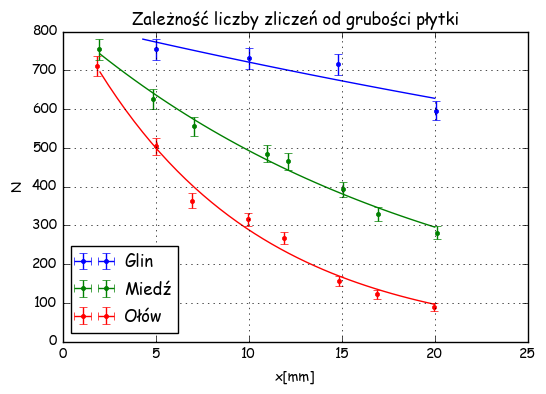

In [15]:
parametrAl, kowAl = curve_fit(krzywa,glin[0],glin[4])
parametrCu, kowCu = curve_fit(krzywa,miedz[0],miedz[4])
parametrPb, kowPb = curve_fit(krzywa,olow[0],olow[4])
plt.errorbar(glin[0],glin[4],uNA,glin[2],'b.',label='Glin')
plt.errorbar(miedz[0],miedz[4],uNC,miedz[2],'g.',label='Miedź')
plt.errorbar(olow[0],olow[4],uNP,olow[2],'r.',label='Ołów')
x = np.linspace(2,20,40)
plt.plot(x,parametrCu[1]*np.exp(-parametrCu[0]*x),'g')
plt.plot(x,parametrPb[1]*np.exp(-parametrPb[0]*x),'r')
plt.plot(x[5:],parametrAl[1]*np.exp(-parametrAl[0]*x[5:]),'b')
plt.grid()
plt.ylabel("N")
plt.xlabel("x[mm]")
plt.title("Zależność liczby zliczeń od grubości płytki")
plt.legend(loc='best')
plt.savefig('Zliczenia.png')

Glin: mi =  0.0148057004602  +/-  0.00525273339364 
ln(N0) =  6.72978212589  +/-  0.0717487959023
Miedź: mi =  0.0524083162955  +/-  0.00305837825616 
ln(N0) =  6.72304074639  +/-  0.0384363903854
Ołów: mi =  0.114793662633  +/-  0.00683638800402 
ln(N0) =  6.80076821487  +/-  0.0845061384969


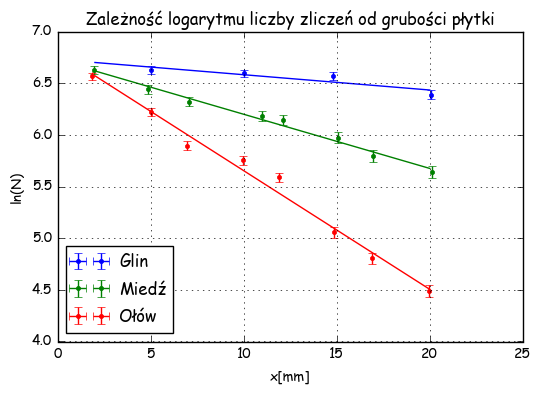

In [17]:
miAl, kowAlln = curve_fit(prosta,glin[0],glin[5])
miCu, kowCuln = np.polyfit(miedz[0],miedz[5],1,cov=True)
miPb, kowPbln = np.polyfit(olow[0],olow[5],1,cov=True)
plt.errorbar(glin[0],glin[5],uNAln,glin[2],'b.',label='Glin')
plt.errorbar(miedz[0],miedz[5],uNCln,miedz[2],'g.',label='Miedź')
plt.errorbar(olow[0],olow[5],uNPln,olow[2],'r.',label='Ołów')
x = np.linspace(2,20,40)
plt.plot(x,miAl[0]*x+miAl[1],'b')
plt.plot(x,miCu[0]*x+miCu[1],'g')
plt.plot(x,miPb[0]*x+miPb[1],'r')
plt.grid()
plt.ylabel("ln(N)")
plt.xlabel("x[mm]")
plt.title("Zależność logarytmu liczby zliczeń od grubości płytki")
plt.legend(loc='best')
plt.savefig('log.png')
print("Glin: mi = ",-miAl[0],' +/- ',np.sqrt(kowAlln[0,0]),"\nln(N0) = ",miAl[1],' +/- ',np.sqrt(kowAlln[1,1]) )
print("Miedź: mi = ",-miCu[0],' +/- ',np.sqrt(kowCuln[0,0]),"\nln(N0) = ",miCu[1],' +/- ',np.sqrt(kowCuln[1,1]))
print("Ołów: mi = ",-miPb[0],' +/- ',np.sqrt(kowPbln[0,0]),"\nln(N0) = ",miPb[1],' +/- ',np.sqrt(kowPbln[1,1]))